## 1. Imports

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, VBox, HBox
import math
import plotly.graph_objects as go
from IPython.display import display, clear_output

## 2. NN class

In [146]:
class DomowaMLP:
    def __init__(self, n_nodes):
        self.values = [np.zeros(n) for n in n_nodes]
        self.weights = [np.zeros((second,first)) for first, second in zip(n_nodes, n_nodes[1:])]
        self.biases = [np.zeros(n) for n in n_nodes[1:]]

    #returns False if dimensions are improper, changes first layer values  and returns True otherwise
    def set_first_layer_values(self, values):
        if len(values) != len(self.values[0]):
            return False
        self.values[0] = values
        return True

    #returns False if dimensions are improper, changes weights and returns True otherwise
    def set_weights(self, weights):
        if len(self.weights) != len(weights):
            return False
        for curr_weight, prop_weight in zip(self.weights, weights): 
            if curr_weight.shape != prop_weight.shape:
                return False
        self.weights = weights
        return True
        
    #returns False if dimensions are improper, changes weights and returns True otherwise
    def set_biases(self, biases):
        if len(biases) != len(self.biases):
            return False
        self.biases = biases
        return True
        
    #updates nodes values
    def update_nodes(self):
        for i in range(1, len(self.values)):  
            self.values[i] = self.activation_function(
                np.dot(self.weights[i-1], self.values[i-1]) + self.biases[i-1]
            )
            
    def activation_function(self, x):
        return 1 / (1 + np.exp(-x))  

    def get_final_layer_values(self):
        return self.values[-1]
    #length on elements of X must equal length of the first layer
    def predict(self, X):
        prediction = []
        for x in X:
            self.set_first_layer_values(x)
            self.update_nodes()
            prediction.append(self.get_final_layer_values())
        return prediction

[0.99999999]


## 3. Network configuration and action

In [167]:
network = DomowaMLP([1, 5, 1])
network.set_weights([np.array([[1], [1], [1], [1],[1]]), np.array([[1, 1, 1, -1, -1]])])

data = pd.read_csv("../data/regression/square-simple-test.csv")

X_original = data['x'].values
X = np.expand_dims(X_original, axis=1)
Y = data['y'].values
Y_pred = objekt.predict(X)
Y_pred = [math.log(y[0]/(1-y[0])) for y in Y_pred]
Y_pred = np.array(Y_pred)

/tmp/ipykernel_5185/2622789044.py:10: RuntimeWarning:

divide by zero encountered in scalar divide



## 4. Plotting

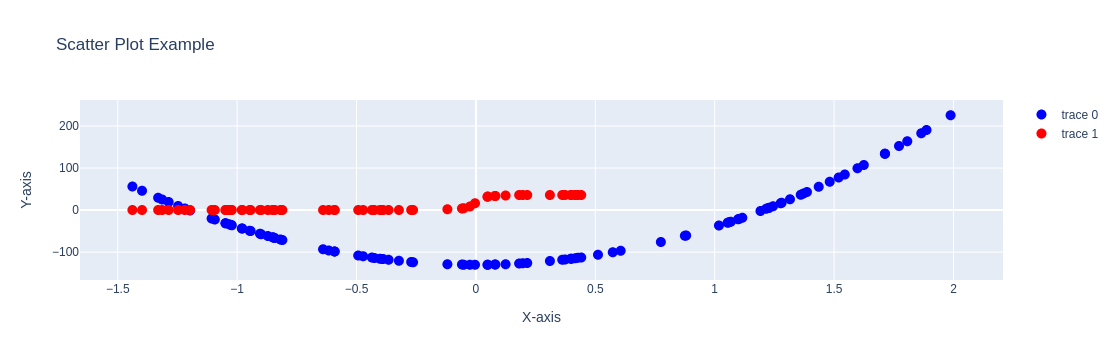

In [166]:
fig = go.Figure(data=go.Scatter(x=X_original, y=Y, mode='markers', marker=dict(color='blue', size=10)))

fig.add_trace(go.Scatter(x=X_original, y=Y_pred, mode='markers', marker=dict(color='red', size=10)))

fig.update_layout(title="Scatter Plot Example", xaxis_title="X-axis", yaxis_title="Y-axis")

fig.show()

In [189]:
# Define interactive function
def interactive_mlp(layer_sizes, X, Y):
    # Initialize the network
    network = DomowaMLP(layer_sizes)

    # Set initial random weights and biases
    initial_weights = [np.random.randn(second, first) for first, second in zip(layer_sizes, layer_sizes[1:])]
    initial_biases = [np.random.randn(n) for n in layer_sizes[1:]]
    network.set_weights(initial_weights)
    network.set_biases(initial_biases)

    # Define sliders for each weight and bias
    weight_sliders = []
    bias_sliders = []
    
    for i in range(len(initial_weights)):
        layer_sliders = []
        for j in range(initial_weights[i].shape[0]):
            for k in range(initial_weights[i].shape[1]):
                slider = widgets.FloatSlider(
                    value=initial_weights[i][j, k],
                    min=-50.0, max=50.0, step=0.01,
                    description=f"W[{i}][{j},{k}]"
                )
                layer_sliders.append(slider)
        weight_sliders.append(layer_sliders)
    
    for i in range(len(initial_biases)):
        layer_bias_sliders = []
        for j in range(len(initial_biases[i])):
            slider = widgets.FloatSlider(
                value=initial_biases[i][j],
                min=-50.0, max=50.0, step=0.01,
                description=f"B[{i}][{j}]"
            )
            layer_bias_sliders.append(slider)
        bias_sliders.append(layer_bias_sliders)

    # Create output widget for dynamic plotting
    plot_output = widgets.Output()

    # Function to update the network
    def update_network(*args):
        new_weights = [np.zeros_like(w) for w in initial_weights]
        new_biases = [np.zeros_like(b) for b in initial_biases]
        
        for i, layer_sliders in enumerate(weight_sliders):
            index = 0
            for j in range(initial_weights[i].shape[0]):
                for k in range(initial_weights[i].shape[1]):
                    new_weights[i][j, k] = layer_sliders[index].value
                    index += 1
        
        for i, layer_bias_sliders in enumerate(bias_sliders):
            for j in range(len(initial_biases[i])):
                new_biases[i][j] = layer_bias_sliders[j].value
        
        network.set_weights(new_weights)
        network.set_biases(new_biases)
        
        # Predict new values
        Y_pred = network.predict(X)
        Y_pred = [math.log(y[0] / (1 - y[0])) for y in Y_pred]
        Y_pred = np.array(Y_pred)

        MSE = sum((Y-Y_pred)**2)/len(Y)
        # Update the scatter plot
        with plot_output:
            clear_output(wait=True)
            fig = go.Figure(data=go.Scatter(x=X.flatten(), y=Y, mode='markers', marker=dict(color='blue', size=10)))
            fig.add_trace(go.Scatter(x=X.flatten(), y=Y_pred, mode='markers', marker=dict(color='red', size=10)))
            fig.update_layout(
                title=f"Interactive MLP - MSE: {MSE}",
                xaxis_title="X-axis",
                yaxis_title="Y-axis"
            )
            fig.show()

    # Link sliders to update function
    for layer_sliders in weight_sliders:
        for slider in layer_sliders:
            slider.observe(update_network, names='value')
    
    for layer_bias_sliders in bias_sliders:
        for slider in layer_bias_sliders:
            slider.observe(update_network, names='value')

    # Display widgets and plot
    weight_box = VBox([HBox(layer) for layer in weight_sliders])
    bias_box = VBox([HBox(layer) for layer in bias_sliders])
    display(VBox([weight_box, bias_box, plot_output]))

    # Initial plot
    update_network()


In [190]:
interactive_mlp([1, 5, 1], X, Y)